Write your own original code that produces a dataset of an X variable and a corresponding Y variable that conforms to the classic univariate regression model. Your data set should have 998 observations and a Normal error term. The slope of the coefficient on your regressor should be negative. Now include two outliers, such that when you fit a regression to all your data, the slope of your regression line is positive.

In [0]:
#a. Your original data-generating equation
#b. Regression results for the original 998 (copy/paste the “summary” output)
#c. Regression results with the outliers included (copy/paste “summary” output)
#d. A properly-labeled data visualization that shows the regression line based on the original 998 points, and another differentiated regression line (on the same axes) based on 1000 points.
#e. No more than 3 sentences that would serve as a caption for your figure if it were to be included in an econometrics textbook to illustrate the dangers of extrapolation


In [3]:
#(a)
cig_no <- c(runif(998, max = 30, min = 2)) # average number of cigarettes per day
noise <- rnorm(998, mean = 0.05, sd = 0.02)
stamina <- -0.01 * cig_no + noise # max exercise stamina
cig.df <- data.frame(`Number of Cigarettes` = cig_no,
                      `Level of Stamina` = stamina)
head(cig.df)

Number.of.Cigarettes,Level.of.Stamina
<dbl>,<dbl>
11.491849,-0.05628776
18.631138,-0.14980013
23.250754,-0.18528217
7.384308,-0.05235193
2.868516,0.01790072
9.129195,-0.03089905


In [4]:
#(b)
stamina_amt.lm <- lm(stamina ~ cig_no, data=cig.df)
summary(stamina_amt.lm)


Call:
lm(formula = stamina ~ cig_no, data = cig.df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053629 -0.013017 -0.000668  0.013314  0.078914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.964e-02  1.384e-03   35.86   <2e-16 ***
cig_no      -9.992e-03  7.727e-05 -129.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02013 on 996 degrees of freedom
Multiple R-squared:  0.9438,	Adjusted R-squared:  0.9437 
F-statistic: 1.672e+04 on 1 and 996 DF,  p-value: < 2.2e-16


In [12]:
#(c)
outlier.1 <- c(-29, -45)# some faulty measurement issue leads to two outliers
outlier.2 <- c(-20, -40)
cig.outlier.df <- rbind(cig.df, outlier.1, outlier.2)
cig.outlier.lm <- lm(Level.of.Stamina ~ Number.of.Cigarettes, data=cig.outlier.df) 
summary(cig.outlier.lm)


Call:
lm(formula = Level.of.Stamina ~ Number.of.Cigarettes, data = cig.outlier.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.067  -0.265   0.070   0.438   0.823 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.807884   0.125826  -6.421 2.10e-10 ***
Number.of.Cigarettes  0.038803   0.007018   5.529 4.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.873 on 998 degrees of freedom
Multiple R-squared:  0.02972,	Adjusted R-squared:  0.02875 
F-statistic: 30.57 on 1 and 998 DF,  p-value: 4.107e-08


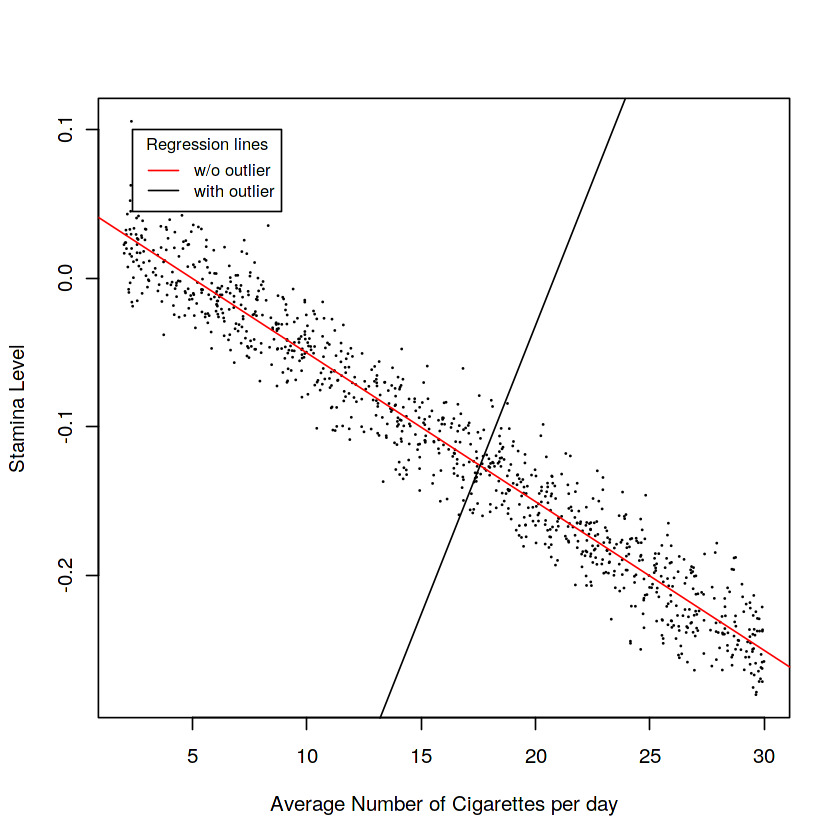

In [14]:
#(d)
plot(cig.df$Number.of.Cigarettes, cig.df$Level.of.Stamina,
     pch = 16, cex = 0.2, xlab = "Average Number of Cigarettes per day", ylab = "Stamina Level")
abline(stamina_amt.lm, col = "red")
abline(cig.outlier.lm, col = "black")
legend("topleft", inset = .05, title = "Regression lines", c("w/o outlier", "with outlier"), col=c("red", "black"), lty=1, cex=0.8)


The data visualization above shows how the level of stamina is dependent on the average number of cigarettes smoked per day. The red trend line shows the first 998 data points, while the black line shows the trend line when two outlier points are added. This demonstrates how extrapolation can lead to spurious relationships between variables - evidenced by the change in the slope from negative to positive using the addition of two outliers. 

2.		Using the Lalonde data set and a linear model that predicts re78 as a linear additive function of age, age^2, educ, treat, treat*age, re74, and re75, estimate:

(a) the 95% interval of expected values for re78, for every TREATED UNIT unit (i.e., each age 17-55, spanning the age range in the data set), using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You should not incorporate simulated sigmas, and you should hold educ, re74, and re75 at their means. Even include ages that are not covered by the data (e.g., 47, 49, etc.).
(b) the 95% interval of expected values for re78, for every CONTROL UNIT unit (i.e., each age 17-55, spanning the age range in the data set), using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You should not incorporate simulated sigmas, and you should hold educ, re74, and re75 at their means. Even include ages that are not covered by the data (e.g., 47, 49, etc.).
(c) the 95% interval of expected values for the treatment effect, for every unit (i.e., each age 17-55, spanning the age range in the data set), using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You should not incorporate simulated sigmas, and you should hold educ, re74, and re75 at their means. Even include ages that are not covered by the data (e.g., 47, 49, etc.).
(d) the 95% prediction interval for the treatment effect, for every unit (i.e., each age, spanning the age range in the data set), using simulation (i.e., 10000 simulated predictions for every row from 10000 sets of coefficients). You will need to incorporate simulated sigmas, and you should hold educ, re74, and re75 at their medians. 
Your answer to this question should consist of the following:
A table with the relevant point estimates: e.g., the bounds of the prediction intervals of y for the different ages, and the means (in reference to parts “a” through “c”) or medians (in reference to part “d”) of the other predictors.
4 figures for (a) through (d). All I am interested in are the prediction intervals for each age. The figures should show how the intervals change over time (i.e., over the range of ages in the data set). Be sure to label your plot’s features (axis, title, etc.).


In [2]:
library(Matching)
library(arm)
data("lalonde")
head(lalonde)


Loading required package: MASS


## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



Loading required package: Matrix


Loading required package: lme4



arm (Version 1.10-1, built: 2018-4-12)



Working directory is /home/user



age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,treat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,11,1,0,1,1,0,0,9930.05,1,1,1
22,9,0,1,0,1,0,0,3595.89,1,1,1
30,12,1,0,0,0,0,0,24909.50,1,1,1
27,11,1,0,0,1,0,0,7506.15,1,1,1
33,8,1,0,0,1,0,0,289.79,1,1,1
22,9,1,0,0,1,0,0,4056.49,1,1,1


[1] 48


Call:
lm(formula = re78 ~ age + age_sq + educ + treat + treat * age + 
    re74 + re75, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -8184  -4613  -1609   2854  53615 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -371.37067 3926.33105  -0.095   0.9247  
age           59.22649  272.25199   0.218   0.8279  
age_sq        -0.89176    4.44398  -0.201   0.8411  
educ         377.05691  179.35668   2.102   0.0361 *
treat       -624.81016 2349.85561  -0.266   0.7904  
re74           0.07117    0.07688   0.926   0.3551  
re75           0.07297    0.13137   0.555   0.5789  
age:treat     88.86364   88.75807   1.001   0.3173  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6545 on 437 degrees of freedom
Multiple R-squared:  0.04126,	Adjusted R-squared:  0.0259 
F-statistic: 2.687 on 7 and 437 DF,  p-value: 0.009841


(Intercept)           age        age_sq          educ         treat 
5137.80303851 -469.53568775    8.31620882  509.57282632 2208.38085045 
         re74          re75     age:treat 
   0.23296642   -0.02194854  -14.05378657

,Mean.PI.Lower.Bound,Mean.PI.Upper.Bound,mean_educ,mean_re74,mean_re75
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,3695.207,7188.675,10.34595,2095.574,1532.056
18,4007.010,7113.704,10.34595,2095.574,1532.056
19,4297.393,7063.350,10.34595,2095.574,1532.056
20,4526.666,7050.594,10.34595,2095.574,1532.056
21,4738.008,7036.544,10.34595,2095.574,1532.056
22,4923.684,7070.231,10.34595,2095.574,1532.056


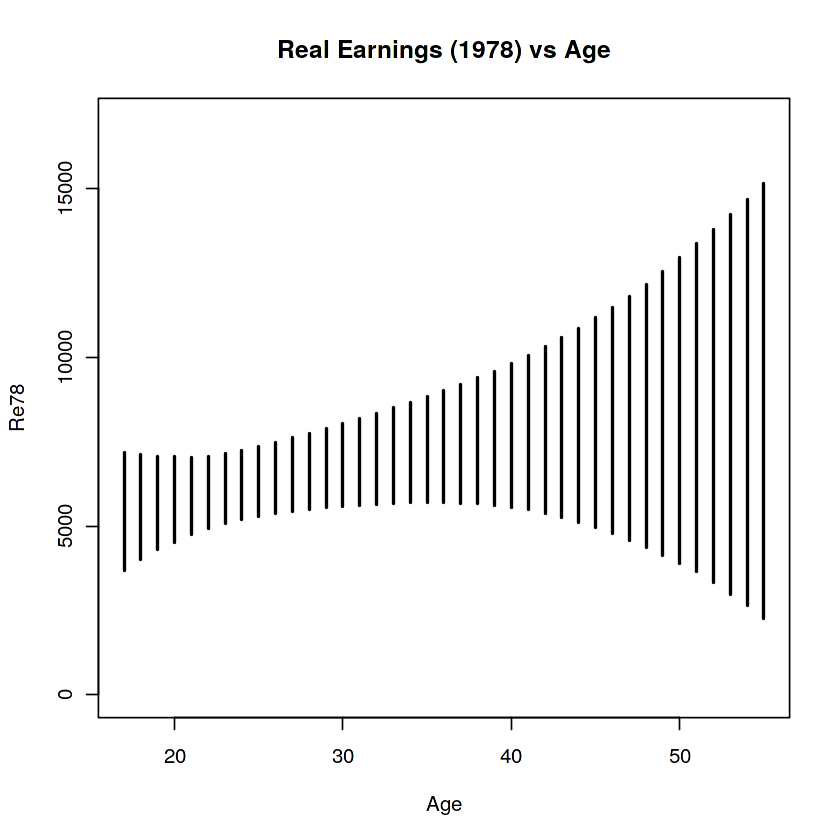

In [7]:
#(a)
lalonde$age_sq <- lalonde$age^2

# isolating only treated units = 1
lalonde.treat <- lalonde[which(lalonde$treat == 1), ]
max(lalonde.treat$age)

# regression model
lalonde.lm1 <- lm(re78 ~ age + age_sq + educ + treat + treat * age + re74 + re75, data = lalonde)
summary(lalonde.lm1)


set.seed(123)
iterate.num <- 10000
lalonde.sim <- sim(lalonde.lm1, n.sims = iterate.num)

lalonde.sim@coef[1,]


simy_mean <- matrix(NA, nrow = iterate.num, ncol = length(
  min(lalonde$age):max(lalonde$age)))

# Holding at the means
mean_educ <- mean(lalonde.treat$educ)
mean_re74 <- mean(lalonde.treat$re74)
mean_re75 <- mean(lalonde.treat$re75)

for (age in min(lalonde$age):max(lalonde$age)) {
  Xs <- c(1, age, age^2, mean_educ, 1, mean_re74, mean_re75, 1 * age)
  for (i in 1:iterate.num) {
    simy_mean[i, age + 1 - min(lalonde$age)] <- sum(Xs*lalonde.sim@coef[i,])
  }
}

confintmean.t <- apply(simy_mean, 2, quantile, probs = c(0.025, 0.975))
mean_treat.t <- t(data.frame(confintmean.t))
colnames(mean_treat.t) <- c("Mean PI Lower Bound", "Mean PI Upper Bound")
mean_treat.t <- data.frame(mean_treat.t, mean_educ, mean_re74, mean_re75)
rownames(mean_treat.t) <- min(lalonde$age):max(lalonde$age)
head(mean_treat.t)

plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(min(lalonde$age),max(lalonde$age)), 
     ylim = c(0,17000), 
     main = "Real Earnings (1978) vs Age", xlab = "Age", 
     ylab = "Re78")

for (age in min(lalonde$age):max(lalonde$age)) {
  segments(
    x0 = age,
    y0 = confintmean.t[1, age - min(lalonde$age) + 1],
    x1 = age,
    y1 = confintmean.t[2, age - min(lalonde$age) + 1],
    lwd = 2)
}



Call:
lm(formula = re78 ~ age + age_sq + educ + treat + treat * age + 
    re74 + re75, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -8184  -4613  -1609   2854  53615 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -371.37067 3926.33105  -0.095   0.9247  
age           59.22649  272.25199   0.218   0.8279  
age_sq        -0.89176    4.44398  -0.201   0.8411  
educ         377.05691  179.35668   2.102   0.0361 *
treat       -624.81016 2349.85561  -0.266   0.7904  
re74           0.07117    0.07688   0.926   0.3551  
re75           0.07297    0.13137   0.555   0.5789  
age:treat     88.86364   88.75807   1.001   0.3173  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6545 on 437 degrees of freedom
Multiple R-squared:  0.04126,	Adjusted R-squared:  0.0259 
F-statistic: 2.687 on 7 and 437 DF,  p-value: 0.009841


(Intercept)           age        age_sq          educ         treat 
5137.80303851 -469.53568775    8.31620882  509.57282632 2208.38085045 
         re74          re75     age:treat 
   0.23296642   -0.02194854  -14.05378657

,Mean.PI.Lower.Bound,Mean.PI.Upper.Bound,mean1_educ,mean1_re74,mean1_re75
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,2961.494,5868.411,10.08846,2107.027,1266.909
18,3170.688,5713.034,10.08846,2107.027,1266.909
19,3346.493,5594.582,10.08846,2107.027,1266.909
20,3500.166,5501.128,10.08846,2107.027,1266.909
21,3590.127,5449.220,10.08846,2107.027,1266.909
22,3653.896,5423.185,10.08846,2107.027,1266.909


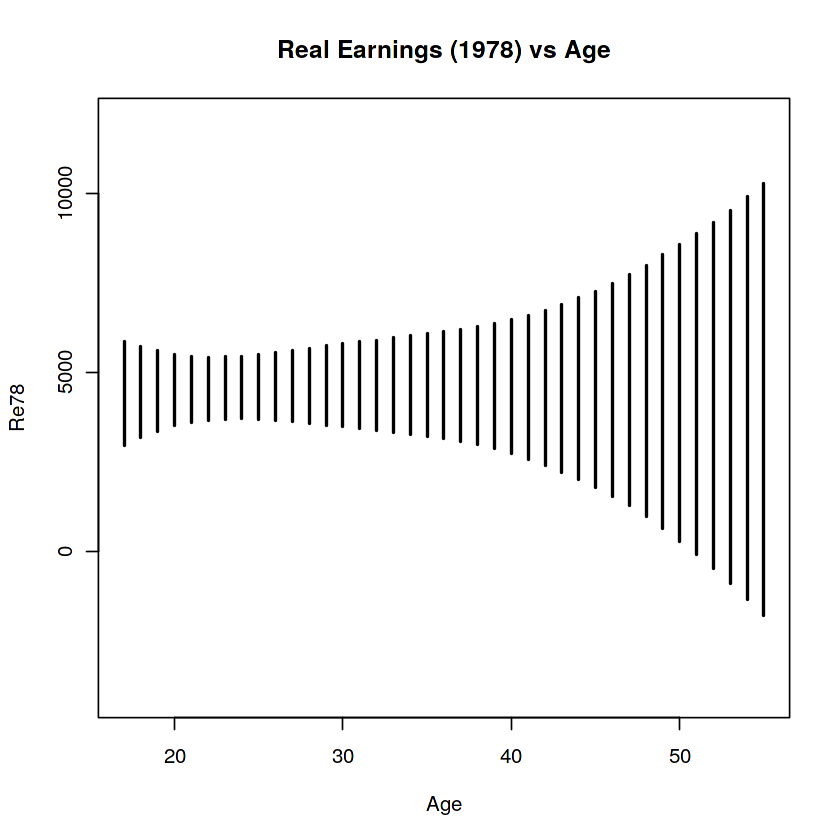

In [9]:
#(b)
# only CONTROL units
lalonde.control <- lalonde[which(lalonde$treat == 0), ]


lalonde.lm2 <- lm(re78 ~ age + age_sq + educ + treat + treat * age + re74 + re75, data = lalonde)
summary(lalonde.lm2)


set.seed(123)
iterate.num <- 10000
sim.lalonde.ctrl <- sim(lalonde.lm2, n.sims = iterate.num)


sim.lalonde.ctrl@coef[1,]

simymean.ctrl <- matrix(NA, nrow = iterate.num, ncol = length(
  min(lalonde$age):max(lalonde$age)))

mean1_educ <- mean(lalonde.control$educ)
mean1_re74 <- mean(lalonde.control$re74)
mean1_re75 <- mean(lalonde.control$re75)

for (age in min(lalonde$age):max(lalonde$age)) {
  Xs <- c(1, age, age^2, mean1_educ, 0, mean1_re74, mean1_re75, 0 * age)
  for (i in 1:iterate.num) {
    simymean.ctrl[i, age + 1 - min(lalonde$age)] <- sum(Xs*sim.lalonde.ctrl@coef[i,])
  }
}

confint.mean.c <- apply(simymean.ctrl, 2, quantile, probs = c(0.025, 0.975))
meantreat.c <- t(data.frame(confint.mean.c))
colnames(meantreat.c) <- c("Mean PI Lower Bound", "Mean PI Upper Bound")
meantreat.c <- data.frame(meantreat.c, mean1_educ, mean1_re74, mean1_re75)
rownames(meantreat.c) <- min(lalonde$age):max(lalonde$age)
head(meantreat.c)


plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(min(lalonde$age),max(lalonde$age)), 
     ylim = c(-4000,12000), 
     main = "Real Earnings (1978) vs Age", xlab = "Age", 
     ylab = "Re78")

for (age in min(lalonde$age):max(lalonde$age)) {
  segments(
    x0 = age,
    y0 = confint.mean.c[1, age - min(lalonde$age) + 1],
    x1 = age,
    y1 = confint.mean.c[2, age - min(lalonde$age) + 1],
    lwd = 2)
}

,Mean.PI.Lower.Bound,Mean.PI.Upper.Bound,mean.educ_trt...mean.educ_ctrl,mean.re74_trt...mean.re74_ctrl,mean.re75_trt...mean.re75_ctrl
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,-920.82115,2928.659,0.2574844,-11.45282,265.1464
18,-701.54169,2884.729,0.2574844,-11.45282,265.1464
19,-496.39104,2878.615,0.2574844,-11.45282,265.1464
20,-291.68844,2862.046,0.2574844,-11.45282,265.1464
21,-100.73043,2839.316,0.2574844,-11.45282,265.1464
22,66.60230,2841.980,0.2574844,-11.45282,265.1464
23,219.90351,2857.029,0.2574844,-11.45282,265.1464
24,362.30647,2899.038,0.2574844,-11.45282,265.1464
25,464.31622,2969.077,0.2574844,-11.45282,265.1464


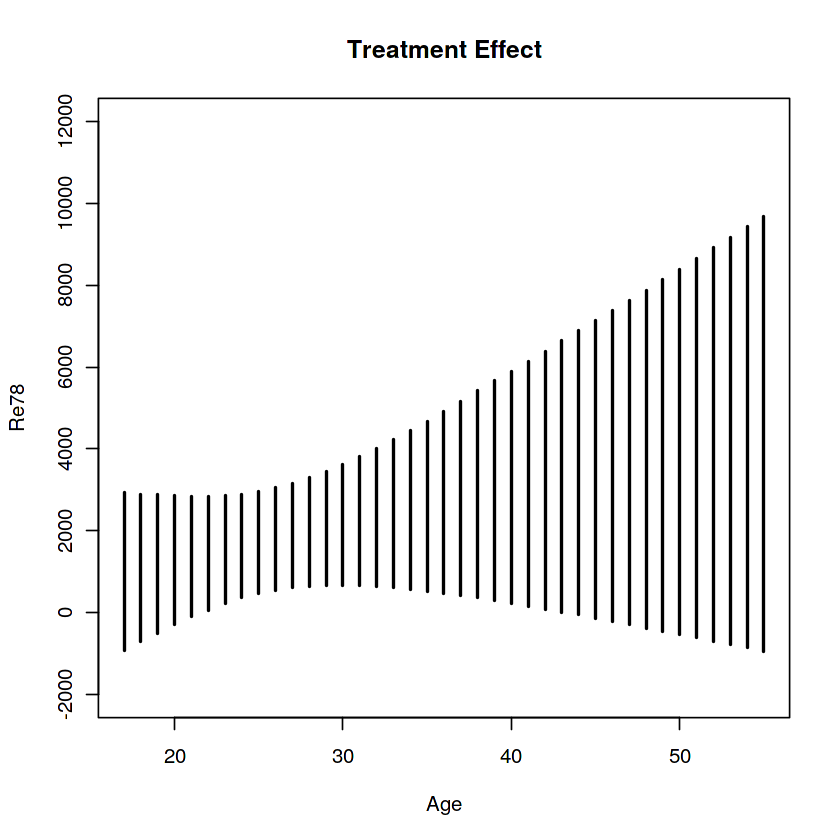

In [11]:
#c)

treat.effect <- matrix(NA, nrow = iterate.num, ncol = length(
  min(lalonde$age):max(lalonde$age)))

mean.educ_ctrl <- mean(lalonde.control$educ)
mean.re74_ctrl <- mean(lalonde.control$re74)
mean.re75_ctrl <- mean(lalonde.control$re75)

mean.educ_trt <- mean(lalonde.treat$educ)
mean.re74_trt <- mean(lalonde.treat$re74)
mean.re75_trt <- mean(lalonde.treat$re75)

for (a in min(lalonde$age):max(lalonde$age)){
  Xs.treat <- c(1, a, a^2, mean.educ_trt, 1, mean.re74_trt, mean.re75_trt, 1*a)
  Xs.control <- c(1, a, a^2, mean.educ_ctrl, 0, mean.re74_ctrl, mean.re75_ctrl, 0*a)
  for(i in 1:iterate.num) {
    treat.effect[i, a + 1 - min(lalonde$age)] <- sum(Xs.treat*lalonde.sim@coef[i, ]) - 
      sum(Xs.control*sim.lalonde.ctrl@coef[i, ])
  }
}

confintmean.eff <- apply(treat.effect, 2, quantile, probs = c(0.025, 0.975))
meantreat.eff <- t(data.frame(confintmean.eff))
colnames(meantreat.eff) <- c("Mean PI Lower Bound", "Mean PI Upper Bound")
meantreat.eff <- data.frame(meantreat.eff, mean.educ_trt - mean.educ_ctrl, 
                               mean.re74_trt - mean.re74_ctrl, 
                               mean.re75_trt - mean.re75_ctrl)
rownames(meantreat.eff) <- min(lalonde$age):max(lalonde$age)
meantreat.eff


plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(min(lalonde$age),max(lalonde$age)), 
     ylim = c(-2000,12000), 
     main = "Treatment Effect", xlab = "Age", 
     ylab = "Re78")

for (age in min(lalonde$age):max(lalonde$age)) {
  segments(
    x0 = age,
    y0 = confintmean.eff[1, age - min(lalonde$age) + 1],
    x1 = age,
    y1 = confintmean.eff[2, age - min(lalonde$age) + 1],
    lwd = 2)
}



,Median.PI.Lower.Bound,Median.PI.Upper.Bound,median.educ.t...median.educ.c,median.re74.t...median.re74.c,median.re75.t...median.re75.c
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,-16980.77,19488.55,1,0,0
18,-17328.90,19675.93,1,0,0
19,-16689.76,19743.77,1,0,0
20,-16747.36,20063.03,1,0,0
21,-16388.70,19834.48,1,0,0
22,-16381.84,19857.63,1,0,0
23,-16545.58,20364.24,1,0,0
24,-16567.86,19970.67,1,0,0
25,-16154.44,20114.47,1,0,0


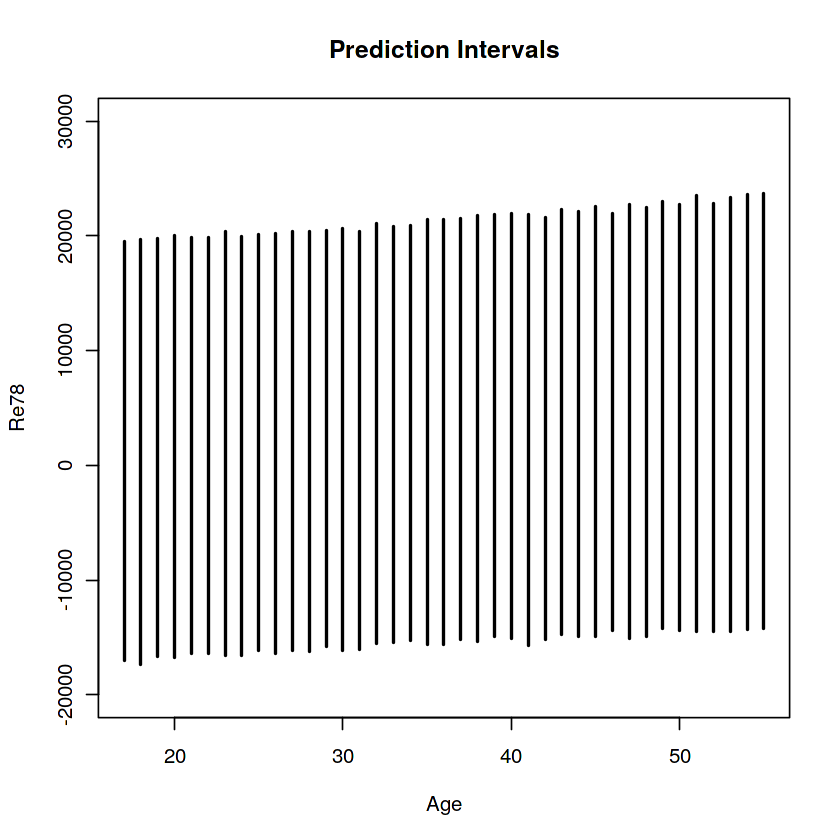

In [12]:
median.educ.c <- median(lalonde.control$educ)
median.re74.c <- median(lalonde.control$re74)
median.re75.c <- median(lalonde.control$re75)


median.educ.t <- median(lalonde.treat$educ)
median.re74.t <- median(lalonde.treat$re74)
median.re75.t <- median(lalonde.treat$re75)

for (a in min(lalonde$age):max(lalonde$age)) {
  X1.treat <- c(1, a, a^2, median.educ.t, 1, median.re74.t, median.re75.t, 1*a)
  X2.control <- c(1, a, a^2, median.educ.c, 0, median.re74.c, median.re75.c, 0*a)
  for(i in 1:iterate.num) {
    treat.effect[i, a + 1 - min(lalonde$age)] <- (sum(X1.treat*lalonde.sim@coef[i, ]) + rnorm(1, 0, lalonde.sim@sigma[i])) - 
      (sum(X2.control*sim.lalonde.ctrl@coef[i, ]) + rnorm(1, 0, sim.lalonde.ctrl@sigma[i])) 
  }
}

# Confidence intervals and tables
confintmed.eff <- apply(treat.effect, 2, quantile, probs = c(0.025, 0.975))
mediantreat.eff <- t(data.frame(confintmed.eff))
colnames(mediantreat.eff) <- c("Median PI Lower Bound", "Median PI Upper Bound")
mediantreat.eff <- data.frame(mediantreat.eff, median.educ.t - median.educ.c, 
                                  median.re74.t - median.re74.c, 
                                  median.re75.t - median.re75.c)
rownames(mediantreat.eff) <- min(lalonde$age):max(lalonde$age)
mediantreat.eff



plot(x = c(1:100), y = c(1:100), type = "n", 
     xlim = c(min(lalonde$age),max(lalonde$age)), 
     ylim = c(-20000, 30000), 
     main = "Prediction Intervals", xlab = "Age", 
     ylab = "Re78")

for (age in min(lalonde$age):max(lalonde$age)) {
  segments(
    x0 = age,
    y0 = confintmed.eff[1, age - min(lalonde$age) + 1],
    x1 = age,
    y1 = confintmed.eff[2, age - min(lalonde$age) + 1],
    lwd = 2)
}


SCHOOL,DISTRICT,TREATMENT,MATH_SCORE,READ_SCORE,PRIOR_MATH_SCORE,PRIOR_READ_SCORE,GENDER,SG_MATH_PROF,SG_READ_PROF
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,0,62.41541,60.66273,57.70976,55.42374,0,1,1
1,1,0,42.06018,60.00448,52.16401,50.43956,0,1,1
1,1,0,61.64790,62.46757,54.99372,55.42374,1,1,1
1,1,0,41.51383,59.56616,61.67929,60.40791,1,1,2
1,1,0,49.09638,52.16666,57.62475,45.45539,0,1,1
1,1,0,48.61066,NA,59.33332,50.43956,1,1,1



Call:
lm(formula = MATH_SCORE ~ TREATMENT, data = afterschool)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.229  -7.982   0.663   9.013  39.097 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.1705     0.3942 142.484  < 2e-16 ***
TREATMENT     3.8787     0.5711   6.791 1.45e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.88 on 2036 degrees of freedom
  (218 observations deleted due to missingness)
Multiple R-squared:  0.02215,	Adjusted R-squared:  0.02167 
F-statistic: 46.12 on 1 and 2036 DF,  p-value: 1.453e-11


[1] 3.878735

[1] 3.885885

2.5%    97.5% 
2.768455 4.997127

[1] 3.878735

,2.5 %,97.5 %
(Intercept),55.397369,56.943612
TREATMENT,2.758678,4.998793


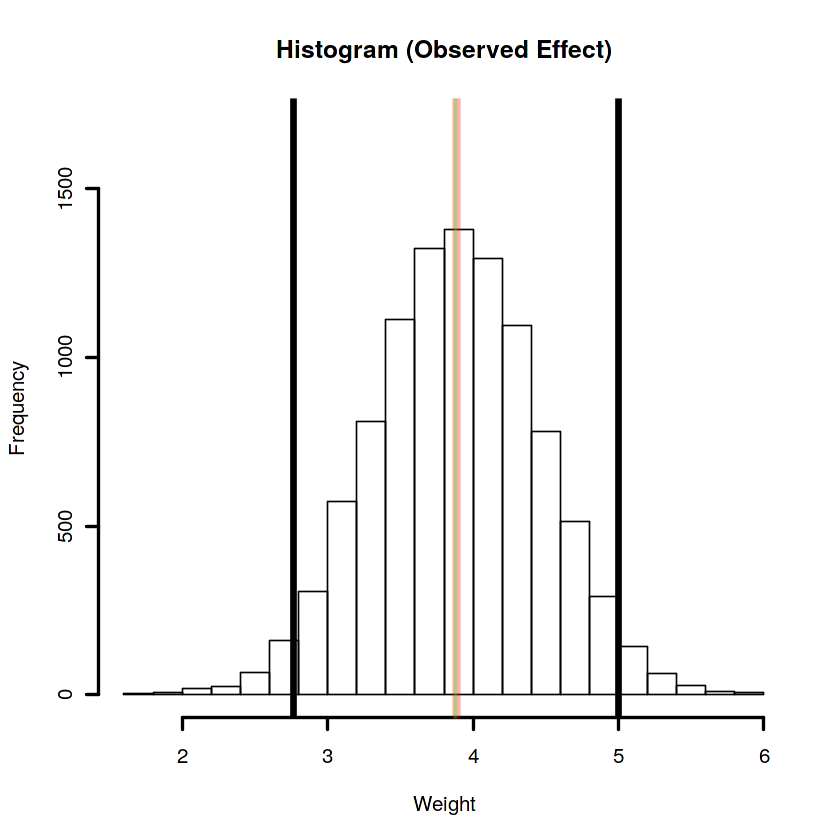

In [22]:
afterschool <- read.csv("school")
head(afterschool)


mathscore.lm <- lm(MATH_SCORE ~ TREATMENT, data = afterschool)
summary(mathscore.lm)
summary(mathscore.lm)$coef[2]


iterate.num <- 10000
storage <- rep(NA, iterate.num)
for (i in 1:iterate.num) {
  temp_lm = lm(MATH_SCORE ~ TREATMENT, data = afterschool[sample(1:nrow(afterschool), nrow(afterschool), replace = T),])
  storage[i] <- temp_lm$coefficients[2]
}

# Histogram
hist(storage, lwd = 2,
     main = "Histogram (Observed Effect)",
     ylim = c(0, 1700),
     xlab = "Weight",
     ylab = "Frequency")
abline(v = mean(storage),
       col = rgb(1,0,0,0.3),
       lwd = 5)
abline(v = quantile(storage, 0.025),
       col = "black",
       lwd = 4)
abline(v = quantile(storage, 0.975),
       col = "black",
       lwd = 4)
abline(v = summary(lm.afterschool)$coef[2],
       col = rgb(0,1,0,0.3),
       lwd = 2)

mean(storage)
quantile(storage, c(0.025, 0.975))
summary(lm.afterschool)$coef[2]
confint(lm.afterschool, level = 0.95)

As you can see the bootstrapped values 

In [26]:
#Q4
r_squared <- function(true.y, pred.y) {
  iterations <- 200000
  storage <- rep(NA, iterations)
  for (i in 1:iterations){
    indices <- sample(1:length(true.y), length(true.y), replace = T)
    newtrue.y <- true.y[indices]
    newpred.y <- pred.y[indices]
    rss <- sum((newtrue.y - newpred.y)**2)
    tss <- sum((newtrue.y - mean(newtrue.y))**2)
    storage[i] <- (1 - rss/tss)
  }
  return(mean(storage))
}


afterschool <- read.csv("school")
afterschool.math <- afterschool[!is.na(afterschool$MATH_SCORE), ]
mathscore.lm2 <- lm(MATH_SCORE ~ TREATMENT, data = afterschool.math)


r_squared(afterschool.math$MATH_SCORE, mathscore.lm2$fitted.values)
summary(lm(MATH_SCORE ~ TREATMENT , data = afterschool))$r.squared



[1] 0.02164911

[1] 0.02215165

In [29]:
library(boot)

nsw <- read.csv("nsw") 
set.seed(12345)
head(nsw)

treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,37,11,1,0,1,1,0,0,9930.0459,TRUE,TRUE
1,22,9,0,1,0,1,0,0,3595.8940,TRUE,TRUE
1,30,12,1,0,0,0,0,0,24909.4492,TRUE,TRUE
1,27,11,1,0,0,1,0,0,7506.1460,TRUE,TRUE
1,33,8,1,0,0,1,0,0,289.7899,TRUE,TRUE
1,22,9,1,0,0,1,0,0,4056.4939,TRUE,TRUE


In [30]:
# Sample for test set
test_set <- sample(1:length(nsw$age), 2000, replace = FALSE) 

# Test set data
test_set_data <- nsw[test_set, ]

# Training set data
training_set_data <- nsw[-test_set, ]


In [31]:
length(test_set_data$age)
length(training_set_data$age)
length(nsw$age)

[1] 2000

[1] 14177

[1] 16177

In [32]:

glm.fit_1 <- glm(treat ~ age + education + black + hispanic + nodegree + married, data = training_set_data)
summary(glm.fit_1)
cv.error_1 = cv.glm(training_set_data, glm.fit_1)
names(cv.error_1)
round(cv.error_1$delta, 8)


test_MSE_1 <- mean((test_set_data$treat - predict.glm(glm.fit_1, test_set_data))^2)
test_MSE_1


glm.fit_2 <- glm(treat ~ age + education + black + married, data = training_set_data)
summary(glm.fit_2)
cv.error_2 = cv.glm(training_set_data, glm.fit_2)
names(cv.error_2)
round(cv.error_2$delta, 8)


test_MSE_2 <- mean((test_set_data$treat - predict.glm(glm.fit_2, test_set_data))^2)
test_MSE_2


glm.fit_3 <- glm(treat ~ age + education, data = training_set_data)
summary(glm.fit_3)
cv.error_3 = cv.glm(training_set_data, glm.fit_3)
names(cv.error_3)
round(cv.error_3$delta, 8)


test_MSE_3 <- mean((test_set_data$treat - predict.glm(glm.fit_3, test_set_data))^2)
test_MSE_3


glm.fit_4 <- glm(treat ~ age + education + hispanic, data = training_set_data)
summary(glm.fit_4)
cv.error_4 = cv.glm(training_set_data, glm.fit_4)
names(cv.error_4)
round(cv.error_4$delta, 8)


test_MSE_4 <- mean((test_set_data$treat - predict.glm(glm.fit_4, test_set_data))^2)
test_MSE_4


glm.fit_5 <- glm(treat ~ age + education + hispanic + married, data = training_set_data)
summary(glm.fit_5)
cv.error_5 = cv.glm(training_set_data, glm.fit_5)
names(cv.error_5)
round(cv.error_5$delta, 8)


test_MSE_5 <- mean((test_set_data$treat - predict.glm(glm.fit_5, test_set_data))^2)
test_MSE_5



Call:
glm(formula = treat ~ age + education + black + hispanic + nodegree + 
    married, data = training_set_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.14245  -0.01267   0.00025   0.00769   1.00896  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.888e-03  6.892e-03   0.854 0.392944    
age         -3.163e-04  8.691e-05  -3.640 0.000274 ***
education    1.066e-03  4.417e-04   2.414 0.015777 *  
black        1.103e-01  3.138e-03  35.138  < 2e-16 ***
hispanic     5.348e-03  3.372e-03   1.586 0.112709    
nodegree     1.962e-02  2.729e-03   7.190 6.80e-13 ***
married     -1.720e-02  2.096e-03  -8.208 2.45e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.01026685)

    Null deviance: 162.10  on 14176  degrees of freedom
Residual deviance: 145.48  on 14170  degrees of freedom
AIC: -24673

Number of Fisher Scoring iterations: 2
